In [9]:
import tensorflow as tf
import cv2
import os
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
fonts = ["futura", "gillsans", "helvetica", "opitma", "andalemono", "arial", "impact", "timenewroman", "trebuchetms", "verdana"]
fonts = [
    "AccanthisADFStd-Bold.otf",
    "AccanthisADFStd-BoldItalic.otf",
    "AccanthisADFStd-Italic.otf",
    "AccanthisADFStd-Regular.otf",
    "AccanthisADFStdNo2-Bold.otf",
    "AccanthisADFStdNo2-BoldItalic.otf",
    "AccanthisADFStdNo2-Italic.otf",
    "AccanthisADFStdNo2-Regular.otf",
    "AccanthisADFStdNo3-Bold.otf",
    "AccanthisADFStdNo3-BoldItalic.otf",
    "AccanthisADFStdNo3-Italic.otf",
    "AccanthisADFStdNo3-Regular.otf",
    "Asana-Math.otf",
    "Cabin-Bold.otf",
    "Cabin-BoldItalic.otf",
    "Cabin-Italic.otf",
    "Cabin-Medium.otf",
    "Cabin-MediumItalic.otf",
    "Cabin-Regular.otf",
    "Cabin-SemiBold.otf",
    "Cabin-SemiBoldItalic.otf",
    "Caladea-Bold.ttf",
    "Caladea-BoldItalic.ttf",
    "Caladea-Italic.ttf",
    "Caladea-Regular.ttf",
    "Carlito-Bold.ttf",
    "Carlito-BoldItalic.ttf",
    "Carlito-Italic.ttf",
    "Carlito-Regular.ttf",
    "Comfortaa-Bold.ttf",
    "Comfortaa-Light.ttf",
    "Comfortaa-Regular.ttf",
    "DejaVuSans-Bold.ttf",
    "DejaVuSans-BoldOblique.ttf",
    "DejaVuSans-ExtraLight.ttf",
    "DejaVuSans-Oblique.ttf",
    "DejaVuSans.ttf",
    "DejaVuSansCondensed-Bold.ttf",
    "DejaVuSansCondensed-BoldOblique.ttf",
    "DejaVuSansCondensed-Oblique.ttf",
    "DejaVuSansCondensed.ttf",
    "DejaVuSansMono-Bold.ttf",
    "DejaVuSansMono-BoldOblique.ttf",
    "DejaVuSansMono-Oblique.ttf",
    "DejaVuSansMono.ttf",
    "DejaVuSerif-Bold.ttf",
    "DejaVuSerif-BoldItalic.ttf",
    "DejaVuSerif-Italic.ttf",
    "DejaVuSerif.ttf",
    "DejaVuSerifCondensed-Bold.ttf",
    "DejaVuSerifCondensed-BoldItalic.ttf",
    "DejaVuSerifCondensed-Italic.ttf",
    "DejaVuSerifCondensed.ttf",
    "EBGaramond-Initials.otf",
    "EBGaramond-Initials.ttf",
    "EBGaramond-InitialsF1.otf",
    "EBGaramond-InitialsF1.ttf",
    "EBGaramond-InitialsF2.otf",
    "EBGaramond-InitialsF2.ttf",
    "EBGaramond08-Italic.otf",
    "EBGaramond08-Italic.ttf",
    "EBGaramond08-Regular.otf",
    "EBGaramond08-Regular.ttf",
    "EBGaramond08-SC.ttf",
    "EBGaramond12-Italic.otf",
    "EBGaramond12-Italic.ttf",
    "EBGaramond12-Regular.otf",
    "EBGaramond12-Regular.ttf",
    "FontAwesome.otf",
    "FreeMono.otf",
    "FreeMono.ttf",
    "FreeMonoBold.otf",
    "FreeMonoBold.ttf",
    "FreeMonoBoldOblique.otf",
    "FreeMonoBoldOblique.ttf",
    "FreeMonoOblique.otf",
    "FreeMonoOblique.ttf",
    "FreeSans.otf",
    "FreeSans.ttf",
    "FreeSansBold.otf",
    "FreeSansBold.ttf",
    "FreeSansBoldOblique.otf",
    "FreeSansBoldOblique.ttf",
    "FreeSansOblique.otf",
    "FreeSansOblique.ttf",
    "FreeSerif.otf",
    "FreeSerif.ttf",
    "FreeSerifBold.otf",
    "FreeSerifBold.ttf",
    "FreeSerifBoldItalic.otf",
    "FreeSerifBoldItalic.ttf",
    "FreeSerifItalic.otf",
    "FreeSerifItalic.ttf",
    "GFSArtemisia.otf",
    "GFSArtemisiaBold.otf",
    "GFSArtemisiaBoldIt.otf",
    "GFSArtemisiaIt.otf",
    "GFSBaskerville.otf",
    "GFSBodoniClassic.otf",
    "GFSDidot.otf",
    "GFSDidotBold.otf",
    "GFSDidotBoldItalic.otf",
    "GFSDidotClassic.otf",
    "GFSDidotItalic.otf",
    "GFSGazis.otf",
    "GFSNeohellenic.otf",
    "GFSNeohellenicBold.otf",
    "GFSNeohellenicBoldIt.otf",
    "GFSNeohellenicIt.otf",
    "GFSOlga.otf",
    "GFSPolyglot.otf",
    "GFSPorson.otf",
    "GFSSolomos.otf",
    "GFSTheokritos.otf",
    "GenBasB.ttf",
    "GenBasBI.ttf",
    "GenBasI.ttf",
    "GenBasR.ttf",
    "GenBkBasB.ttf",
    "GenBkBasBI.ttf",
    "GenBkBasI.ttf",
    "GenBkBasR.ttf",
    "Gentium-I.ttf",
    "Gentium-R.ttf",
    "GentiumAlt-I.ttf",
    "GentiumAlt-R.ttf",
    "GentiumPlus-I.ttf",
    "GentiumPlus-R.ttf",
    "GilliusADF-Bold.otf",
    "GilliusADF-BoldItalic.otf",
    "GilliusADF-Italic.otf",
    "GilliusADF-Regular.otf",
    "GilliusADFCd-Bold.otf",
    "GilliusADFCd-BoldItalic.otf",
    "GilliusADFCd-Italic.otf",
    "GilliusADFCd-Regular.otf",
    "GilliusADFNo2-Bold.otf",
    "GilliusADFNo2-BoldItalic.otf",
    "GilliusADFNo2-Italic.otf",
    "GilliusADFNo2-Regular.otf",
    "GilliusADFNo2Cd-Bold.otf",
    "GilliusADFNo2Cd-BoldItalic.otf",
    "GilliusADFNo2Cd-Italic.otf",
    "GilliusADFNo2Cd-Regular.otf",
    "Junicode-Bold.ttf",
    "Junicode-BoldItalic.ttf",
    "Junicode-Italic.ttf",
    "Junicode.ttf",
    "Lato-Black.ttf",
    "Lato-BlackItalic.ttf",
    "Lato-Bold.ttf",
    "Lato-BoldItalic.ttf",
    "Lato-Hairline.ttf",
    "Lato-HairlineItalic.ttf",
    "Lato-Heavy.ttf",
    "Lato-HeavyItalic.ttf",
    "Lato-Italic.ttf",
    "Lato-Light.ttf",
    "Lato-LightItalic.ttf",
    "Lato-Medium.ttf",
    "Lato-MediumItalic.ttf",
    "Lato-Regular.ttf",
    "Lato-Semibold.ttf",
    "Lato-SemiboldItalic.ttf",
    "Lato-Thin.ttf",
    "Lato-ThinItalic.ttf",
    "LinBiolinum_K.otf",
    "LinBiolinum_R.otf",
    "LinBiolinum_RB.otf",
    "LinBiolinum_RI.otf",
    "LinLibertine_DR.otf",
    "LinLibertine_I.otf",
    "LinLibertine_M.otf",
    "LinLibertine_R.otf",
    "LinLibertine_RB.otf",
    "LinLibertine_RBI.otf",
    "LinLibertine_RI.otf",
    "LinLibertine_RZ.otf",
    "LinLibertine_RZI.otf",
    "LobsterTwo-Bold.otf",
    "LobsterTwo-BoldItalic.otf",
    "LobsterTwo-Italic.otf",
    "LobsterTwo-Regular.otf",
    "Roboto-Black.ttf",
    "Roboto-BlackItalic.ttf",
    "Roboto-Bold.ttf",
    "Roboto-BoldItalic.ttf",
    "Roboto-Italic.ttf",
    "Roboto-Light.ttf",
    "Roboto-LightItalic.ttf",
    "Roboto-Medium.ttf",
    "Roboto-MediumItalic.ttf",
    "Roboto-Regular.ttf",
    "Roboto-Thin.ttf",
    "Roboto-ThinItalic.ttf",
    "RobotoCondensed-Bold.ttf",
    "RobotoCondensed-BoldItalic.ttf",
    "RobotoCondensed-Italic.ttf",
    "RobotoCondensed-Light.ttf",
    "RobotoCondensed-LightItalic.ttf",
    "RobotoCondensed-Regular.ttf",
    "STIX-Bold.otf",
    "STIX-BoldItalic.otf",
    "STIX-Italic.otf",
    "STIX-Regular.otf",
    "STIXGeneral-Bold.otf",
    "STIXGeneral-BoldItalic.otf",
    "STIXGeneral-Italic.otf",
    "STIXGeneral-Regular.otf",
    "STIXIntegralsD-Bold.otf",
    "STIXIntegralsD-Regular.otf",
    "STIXIntegralsSm-Bold.otf",
    "STIXIntegralsSm-Regular.otf",
    "STIXIntegralsUp-Bold.otf",
    "STIXIntegralsUp-Regular.otf",
    "STIXIntegralsUpD-Bold.otf",
    "STIXIntegralsUpD-Regular.otf",
    "STIXIntegralsUpSm-Bold.otf",
    "STIXIntegralsUpSm-Regular.otf",
    "STIXMath-Regular.otf",
    "STIXNonUnicode-Bold.otf",
    "STIXNonUnicode-BoldItalic.otf",
    "STIXNonUnicode-Italic.otf",
    "STIXNonUnicode-Regular.otf",
    "STIXSizeFiveSym-Regular.otf",
    "STIXSizeFourSym-Bold.otf",
    "STIXSizeFourSym-Regular.otf",
    "STIXSizeOneSym-Bold.otf",
    "STIXSizeOneSym-Regular.otf",
    "STIXSizeThreeSym-Bold.otf",
    "STIXSizeThreeSym-Regular.otf",
    "STIXSizeTwoSym-Bold.otf",
    "STIXSizeTwoSym-Regular.otf",
    "STIXVariants-Bold.otf",
    "STIXVariants-Regular.otf",
    "UniversalisADFCdStd-BdOblique.otf",
    "UniversalisADFCdStd-Bold.otf",
    "UniversalisADFCdStd-Oblique.otf",
    "UniversalisADFCdStd-Regular.otf",
    "UniversalisADFStd-Bold.otf",
    "UniversalisADFStd-BoldOblique.otf",
    "UniversalisADFStd-Oblique.otf",
    "UniversalisADFStd-Regular.otf",
    "Vera.ttf",
    "VeraBI.ttf",
    "VeraBd.ttf",
    "VeraIt.ttf",
    "VeraMoBI.ttf",
    "VeraMoBd.ttf",
    "VeraMoIt.ttf",
    "VeraMono.ttf",
    "VeraSe.ttf",
    "VeraSeBd.ttf",
    "amiri-bold.ttf",
    "amiri-boldslanted.ttf",
    "amiri-quran.ttf",
    "amiri-regular.ttf",
    "amiri-slanted.ttf",
    "cmex10.ttf",
    "cmmi10.ttf",
    "cmr10.ttf",
    "cmsy10.ttf",
    "esint10.ttf",
    "eufm10.ttf",
    "fontawesome-webfont.ttf",
    "fonts-japanese-gothic.ttf",
    "fonts-japanese-mincho.ttf",
    "ipaexg.ttf",
    "ipaexm.ttf",
    "ipag.ttf",
    "ipagp.ttf",
    "ipam.ttf",
    "ipamp.ttf",
    "lobster.otf",
    "mplus-1c-black.ttf",
    "mplus-1c-bold.ttf",
    "mplus-1c-heavy.ttf",
    "mplus-1c-light.ttf",
    "mplus-1c-medium.ttf",
    "mplus-1c-regular.ttf",
    "mplus-1c-thin.ttf",
    "mplus-1m-bold.ttf",
    "mplus-1m-light.ttf",
    "mplus-1m-medium.ttf",
    "mplus-1m-regular.ttf",
    "mplus-1m-thin.ttf",
    "mplus-1mn-bold.ttf",
    "mplus-1mn-light.ttf",
    "mplus-1mn-medium.ttf",
    "mplus-1mn-regular.ttf",
    "mplus-1mn-thin.ttf",
    "mplus-1p-black.ttf",
    "mplus-1p-bold.ttf",
    "mplus-1p-heavy.ttf",
    "mplus-1p-light.ttf",
    "mplus-1p-medium.ttf",
    "mplus-1p-regular.ttf",
    "mplus-1p-thin.ttf",
    "mplus-2c-black.ttf",
    "mplus-2c-bold.ttf",
    "mplus-2c-heavy.ttf",
    "mplus-2c-light.ttf",
    "mplus-2c-medium.ttf",
    "mplus-2c-regular.ttf",
    "mplus-2c-thin.ttf",
    "mplus-2m-bold.ttf",
    "mplus-2m-light.ttf",
    "mplus-2m-medium.ttf",
    "mplus-2m-regular.ttf",
    "mplus-2m-thin.ttf",
    "mplus-2p-black.ttf",
    "mplus-2p-bold.ttf",
    "mplus-2p-heavy.ttf",
    "mplus-2p-light.ttf",
    "mplus-2p-medium.ttf",
    "mplus-2p-regular.ttf",
    "mplus-2p-thin.ttf",
    "msam10.ttf",
    "msbm10.ttf",
    "rsfs10.ttf",
    "stmary10.ttf",
    "wasy10.ttf"]
imgSize = 64

for font in fonts:
    print font
    pathToDataset = "../datasets/out/" + font + "/"
    pathToDatasetSave = "../datasets/out-train/" + font + "/"
    imgs = os.listdir(pathToDataset)
    make(imgs, pathToDataset, pathToDatasetSave, n=1000)

AccanthisADFStd-Bold.otf
AccanthisADFStd-BoldItalic.otf


In [35]:
def rotate(src):
    rows,cols = src.shape
    r = random.uniform(0, 360)
    M = cv2.getRotationMatrix2D((cols/2,rows/2), r, 1)

    return cv2.warpAffine(src, M, (rows, cols), flags=cv2.INTER_LINEAR)

def move(src):
    rows,cols = src.shape
    dx = random.uniform(0, 5)
    dy = random.uniform(0, 5)
    M = np.float32([[1, 0, dx],[0, 1, dy]])
    
    return cv2.warpAffine(src,M,(cols,rows))

def dilate_and_erode(src, iterations=1):
    neiborhood4 = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], np.uint8)
    neiborhood8 = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]], np.uint8)
    
    src = cv2.dilate(src, neiborhood8, iterations=iterations)
    src = cv2.erode(src, neiborhood8, iterations=iterations)
    
    return src

In [90]:
def make(imgs, pathToDataset, pathToDatasetSaved, n=100):
    for img in imgs:
        if img.find(".png") > -1 :
            src = cv2.imread(pathToDataset + img, 0)
            src = cv2.resize(src, (imgSize, imgSize))
            src = cv2.bitwise_not(src)
            prefix = img.split(".")[0]
            for x in xrange(1, n):
                dst = move(rotate(src))
                cv2.imwrite(pathToDatasetSaved + prefix + "-" + "{0:04d}".format(x) + ".png", dst)

# convert で文字画像生成

```bash
$ convert -background white -fill black -size 32x32 -gravity center -font [font] label:[label] [output]
```

## 各種準備ファイル

```
mitake@mitake-mba ~/study-ml/datasets ±master⚡ » cat fonts.txt 
futura,/Library/Fonts/Futura.ttc
gillsans,/Library/Fonts/GillSans.ttc
helvetica,/System/Library/Fonts/HelveticaNeueDeskInterface.ttc
opitma,/System/Library/Fonts/Optima.ttc
andalemono,/Library/Fonts/Andale Mono.ttf
arial,/Library/Fonts/Arial.ttf
impact,/Library/Fonts/Impact.ttf
timenewroman,/Library/Fonts/Times New Roman.ttf
trebuchetms,/Library/Fonts/Trebuchet MS.ttf
verdana,/Library/Fonts/Verdana.ttf

mitake@mitake-mba ~/study-ml/datasets ±master⚡ » cat data.txt 
a
b
c
d
e
f
g
h
i
j
k
l
m
n
o
p
q
r
s
t
u
v
w
x
y
z
```

## 学習データ用の画像を一括生成

```
 join -j `cat fonts.txt | wc -l` -t, fonts.txt data.txt | awk -F, '{print "convert -background white -fill black -size 32x32 -gravity center -font \"" $3 "\" label:" $4 " out/" $2 "-" $4 ".jpg"}' | sh
```

```
 join -j `cat fonts.txt | wc -l` -t, fonts.txt data.txt | awk -F, '{print "convert -background white -fill black -size 64x64 -gravity center -font \"" $3 "\" label:" $4 " out/" $2 "/" $4 ".png"}' | sh
```

In [68]:
src = cv2.imread("../datasets/50718989-97fc-8532-aaf3-fb6f91cd4516.png", 0)
src = cv2.bitwise_not(src)
src = cv2.resize(src, (485/2, 556/2))

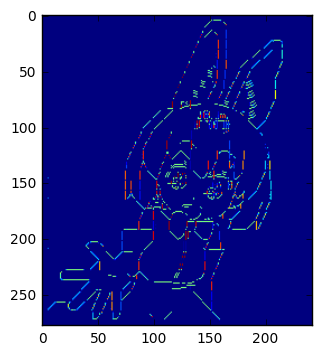

In [69]:
plt.imshow(src)

In [86]:
dst = dilate_and_erode(src, iterations=1)
dst = cv2.resize(dst, (485, 556))

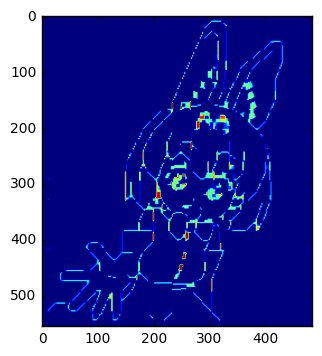

In [87]:
cv2.imwrite("dst.png", dst)
plt.imshow(dst)